In [81]:
import pandas as pd

In [82]:
df = pd.read_csv("../ames/test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [211]:
arr1 = df.columns.values
arr2 = df.columns.values

In [ ]:
arr1 = pd.Series(df.columns.values).str.lower()
arr2 = pd.Series(df.columns.values).str.lower()

In [213]:
arr1

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [214]:
from similarity.normalized_levenshtein import NormalizedLevenshtein
normalized_levenshtein = NormalizedLevenshtein()

In [215]:
vectors = pd.DataFrame([[normalized_levenshtein.distance(i, j) for j in arr2] for i in arr1])
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333,1.000000,0.923077
1,1.0,0.000000,0.800000,0.909091,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,...,1.000000,0.900000,0.900000,1.000000,0.909091,0.800000,0.700000,0.800000,0.900000,0.923077
2,1.0,0.800000,0.000000,0.727273,1.000000,0.875000,1.000000,1.000000,0.818182,0.888889,...,0.909091,1.000000,0.875000,0.875000,0.909091,0.875000,0.750000,0.875000,1.000000,0.769231
3,1.0,0.909091,0.727273,0.000000,0.545455,0.727273,1.000000,0.545455,0.636364,0.818182,...,1.000000,0.818182,0.818182,0.727273,0.818182,0.909091,0.818182,0.909091,0.909091,0.769231
4,1.0,0.900000,1.000000,0.545455,0.000000,0.714286,0.857143,0.625000,0.818182,0.888889,...,0.909091,0.375000,0.857143,0.857143,0.818182,1.000000,0.857143,1.000000,1.000000,0.923077


In [216]:
from sklearn.decomposition import PCA

In [217]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vectors)
pc = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
pc.head()

,pc1,pc2
0,-0.093302,-0.437746
1,-0.069752,-0.191066
2,0.286697,-0.380828
3,0.423099,-0.221348
4,-0.046492,0.005565


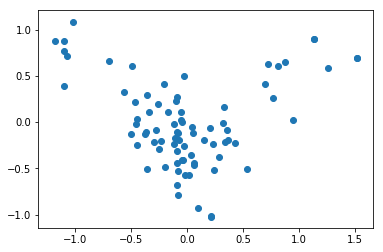

In [218]:
import matplotlib.pyplot as plt
plt.scatter(pc['pc1'], pc['pc2'])
plt.show()

In [227]:
from sklearn.cluster import KMeans
clusters = 4
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(vectors)

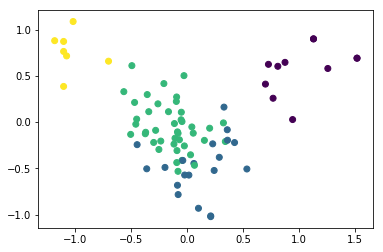

In [228]:
plt.scatter(pc['pc1'], pc['pc2'], c=kmeans.labels_)
plt.show()

In [229]:
import numpy as np

def dist(x, y): # computationally effcient
    return np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y))

def mean_dist(DF, X):
    dists = DF.apply(dist, args=(X, ), axis=1)
    return dists.mean()

In [232]:
#kmeans.cluster_centers_

for i in range(clusters):
    print("Cluster " + str(i) + ":")
    print("Mean Dist to Centroid: ")
    print(mean_dist(vectors[kmeans.labels_==i], 
                    kmeans.cluster_centers_[i]))
    
    print(pd.Series(arr1[kmeans.labels_==i]))
    print('\n')

Cluster 0:
Mean Dist to Centroid: 
1.0032843685816841
0         BsmtQual
1         BsmtCond
2     BsmtExposure
3     BsmtFinType1
4       BsmtFinSF1
5     BsmtFinType2
6       BsmtFinSF2
7        BsmtUnfSF
8         1stFlrSF
9     BsmtFullBath
10    BsmtHalfBath
dtype: object


Cluster 1:
Mean Dist to Centroid: 
1.1901709377732
0          MSZoning
1       LotFrontage
2       LandContour
3         LotConfig
4      Neighborhood
5        Condition1
6        Condition2
7       OverallCond
8       Exterior1st
9       Exterior2nd
10        ExterCond
11       Foundation
12          Heating
13        HeatingQC
14       CentralAir
15     LowQualFinSF
16       Functional
17           MoSold
18           YrSold
19    SaleCondition
dtype: object


Cluster 2:
Mean Dist to Centroid: 
1.2551957604985002
0                Id
1        MSSubClass
2           LotArea
3            Street
4             Alley
5          LotShape
6         Utilities
7         LandSlope
8          BldgType
9        HouseStyle


/Users/kylemaxwell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


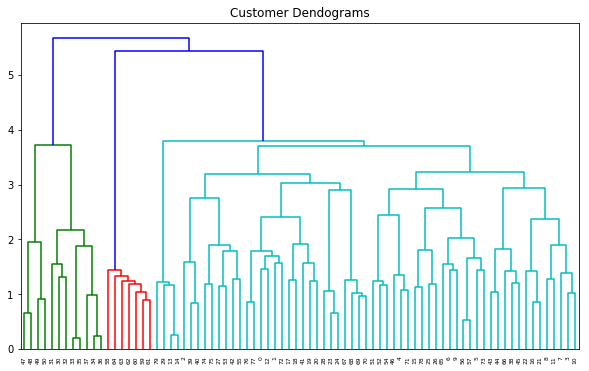

In [246]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 6))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(vectors, method='ward'))  #Ward variance minimization algorithm

In [249]:
from sklearn.cluster import AgglomerativeClustering

clusters = 6
agg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=clusters,
            pooling_func='deprecated').fit(vectors)

/Users/kylemaxwell/anaconda3/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


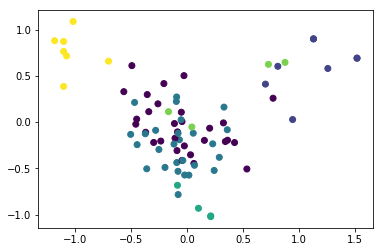

In [250]:
plt.scatter(pc['pc1'], pc['pc2'], c=agg.labels_)
plt.show()

In [253]:
for i in range(clusters):
    print("Cluster " + str(i) + ":")
    print(pd.Series(arr1[agg.labels_==i]))
    print('\n')

Cluster 0:
0      LotFrontage
1          LotArea
2           Street
3            Alley
4         LotShape
5      LandContour
6        Utilities
7        LotConfig
8        LandSlope
9         BldgType
10      HouseStyle
11       RoofStyle
12        RoofMatl
13      MasVnrType
14      MasVnrArea
15     TotalBsmtSF
16        1stFlrSF
17        2ndFlrSF
18    LowQualFinSF
19       GrLivArea
20    BedroomAbvGr
21    KitchenAbvGr
22    TotRmsAbvGrd
23      Fireplaces
24     FireplaceQu
25      PavedDrive
26      WoodDeckSF
27        PoolArea
28           Fence
29        SaleType
dtype: object


Cluster 1:
0        BsmtQual
1        BsmtCond
2    BsmtExposure
3    BsmtFinType1
4      BsmtFinSF1
5    BsmtFinType2
6      BsmtFinSF2
7       BsmtUnfSF
dtype: object


Cluster 2:
0                Id
1        MSSubClass
2          MSZoning
3      Neighborhood
4       OverallQual
5       OverallCond
6         YearBuilt
7      YearRemodAdd
8       Exterior1st
9       Exterior2nd
10        ExterQual
1